In [268]:
%pylab inline

import io3d
from pathlib import Path

Populating the interactive namespace from numpy and matplotlib


# Virtual hepatectomy

Merge manual segmentation of left liver with ircad segmentation of the liver. Input data:

* Manual segmentation of left part of the liver with careful segmentation of resection line but no care about the segmentation quality on the liver boundary.

* Manual liver segmentation from ircad

In the fallowing scrip we just combine both this sources into one file with labeling of left and right part of the liver.


In [269]:
# 6, 11, 16 nefunguje
ircad_id = "10"
ircad_id = "12"
ircad_id = "11"
ircad_id = "20"

In [270]:
pth_left = f"C:/Users/Jirik/lisa_data/ircad{ircad_id}_left.pklz"
pth_left = f"G:\Můj disk\data\medical\orig\ircad_left_right/patient_dicom_seg{ircad_id}.pklz"
pth_liver = f"C:/Users/Jirik/data/medical/orig/3Dircadb1.{ircad_id}/MASKS_DICOM/liver/"
pth_output = f"C:/Users/Jirik/lisa_data/ircad{ircad_id}_liver_LR.pklz"

2020-05-26 14:19:44.142 | DEBUG    | io3d.datareader:Get3DData:146 - file read recognized
2020-05-26 14:19:44.144 | DEBUG    | io3d.datareader:__ReadFromFile:254 - pklz format detected
2020-05-26 14:19:45.050 | DEBUG    | io3d.datareader:Get3DData:166 - dataplus format
2020-05-26 14:19:45.054 | DEBUG    | io3d.datareader:Get3DData:170 - datap keys () : dict_keys(['series_number', 'datadir', 'voxelsize_mm', 'data3d'])
2020-05-26 14:19:45.065 | DEBUG    | io3d.datareader:Get3DData:150 - directory read recognized
2020-05-26 14:19:45.084 | WARNING  | io3d.dcmreaddata:is_dicom_dir:74 - Unable to read dicom file dicomdir.pkl
2020-05-26 14:19:45.087 | WARNING  | io3d.dcmreaddata:is_dicom_dir:75 - File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.
2020-05-26 14:19:45.096 | DEBUG    | io3d.datareader:__ReadFromDirectory:191 - Dir - DICOM
2020-05-26 14:19:45.097 | DEBUG    | io3d.datareader:__ReadFromDirectory:192 

2020-05-26 14:19:45.580 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 58982400, shape: (512, 512)x225 file C:\Users\Jirik\data\medical\orig\3Dircadb1.20\MASKS_DICOM\liver\image_37
2020-05-26 14:19:45.592 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 58982400, shape: (512, 512)x225 file C:\Users\Jirik\data\medical\orig\3Dircadb1.20\MASKS_DICOM\liver\image_38
2020-05-26 14:19:45.620 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 58982400, shape: (512, 512)x225 file C:\Users\Jirik\data\medical\orig\3Dircadb1.20\MASKS_DICOM\liver\image_39
2020-05-26 14:19:45.630 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 58982400, shape: (512, 512)x225 file C:\Users\Jirik\data\medical\orig\3Dircadb1.20\MASKS_DICOM\liver\image_40
2020-05-26 14:19:45.641 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 58982400, shape: (512, 512)x225 file C:\Users\Jirik\data\medical\orig\3Dircadb1.20\MASKS_DICOM\liver\image_41
2020-05-26 14:19:45.652 | DEBUG    | io3

2020-05-26 14:19:46.001 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 58982400, shape: (512, 512)x225 file C:\Users\Jirik\data\medical\orig\3Dircadb1.20\MASKS_DICOM\liver\image_80
2020-05-26 14:19:46.005 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 58982400, shape: (512, 512)x225 file C:\Users\Jirik\data\medical\orig\3Dircadb1.20\MASKS_DICOM\liver\image_81
2020-05-26 14:19:46.013 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 58982400, shape: (512, 512)x225 file C:\Users\Jirik\data\medical\orig\3Dircadb1.20\MASKS_DICOM\liver\image_82
2020-05-26 14:19:46.022 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 58982400, shape: (512, 512)x225 file C:\Users\Jirik\data\medical\orig\3Dircadb1.20\MASKS_DICOM\liver\image_83
2020-05-26 14:19:46.034 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 58982400, shape: (512, 512)x225 file C:\Users\Jirik\data\medical\orig\3Dircadb1.20\MASKS_DICOM\liver\image_84
2020-05-26 14:19:46.044 | DEBUG    | io3

2020-05-26 14:19:46.338 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 58982400, shape: (512, 512)x225 file C:\Users\Jirik\data\medical\orig\3Dircadb1.20\MASKS_DICOM\liver\image_123
2020-05-26 14:19:46.343 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 58982400, shape: (512, 512)x225 file C:\Users\Jirik\data\medical\orig\3Dircadb1.20\MASKS_DICOM\liver\image_124
2020-05-26 14:19:46.351 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 58982400, shape: (512, 512)x225 file C:\Users\Jirik\data\medical\orig\3Dircadb1.20\MASKS_DICOM\liver\image_125
2020-05-26 14:19:46.358 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 58982400, shape: (512, 512)x225 file C:\Users\Jirik\data\medical\orig\3Dircadb1.20\MASKS_DICOM\liver\image_126
2020-05-26 14:19:46.364 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 58982400, shape: (512, 512)x225 file C:\Users\Jirik\data\medical\orig\3Dircadb1.20\MASKS_DICOM\liver\image_127
2020-05-26 14:19:46.373 | DEBUG    

2020-05-26 14:19:46.677 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 58982400, shape: (512, 512)x225 file C:\Users\Jirik\data\medical\orig\3Dircadb1.20\MASKS_DICOM\liver\image_166
2020-05-26 14:19:46.692 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 58982400, shape: (512, 512)x225 file C:\Users\Jirik\data\medical\orig\3Dircadb1.20\MASKS_DICOM\liver\image_167
2020-05-26 14:19:46.702 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 58982400, shape: (512, 512)x225 file C:\Users\Jirik\data\medical\orig\3Dircadb1.20\MASKS_DICOM\liver\image_168
2020-05-26 14:19:46.707 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 58982400, shape: (512, 512)x225 file C:\Users\Jirik\data\medical\orig\3Dircadb1.20\MASKS_DICOM\liver\image_169
2020-05-26 14:19:46.713 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 58982400, shape: (512, 512)x225 file C:\Users\Jirik\data\medical\orig\3Dircadb1.20\MASKS_DICOM\liver\image_170
2020-05-26 14:19:46.721 | DEBUG    

2020-05-26 14:19:47.052 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 58982400, shape: (512, 512)x225 file C:\Users\Jirik\data\medical\orig\3Dircadb1.20\MASKS_DICOM\liver\image_209
2020-05-26 14:19:47.060 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 58982400, shape: (512, 512)x225 file C:\Users\Jirik\data\medical\orig\3Dircadb1.20\MASKS_DICOM\liver\image_210
2020-05-26 14:19:47.066 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 58982400, shape: (512, 512)x225 file C:\Users\Jirik\data\medical\orig\3Dircadb1.20\MASKS_DICOM\liver\image_211
2020-05-26 14:19:47.075 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 58982400, shape: (512, 512)x225 file C:\Users\Jirik\data\medical\orig\3Dircadb1.20\MASKS_DICOM\liver\image_212
2020-05-26 14:19:47.083 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 58982400, shape: (512, 512)x225 file C:\Users\Jirik\data\medical\orig\3Dircadb1.20\MASKS_DICOM\liver\image_213
2020-05-26 14:19:47.092 | DEBUG    

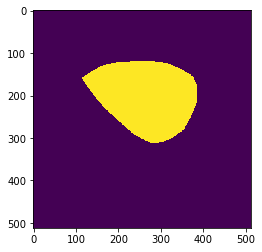

In [271]:
dp_left = io3d.read(pth_left, dataplus_format=True)
dp_liver = io3d.read(pth_liver, dataplus_format=True)
imshow(dp_left["data3d"][30,:,:])

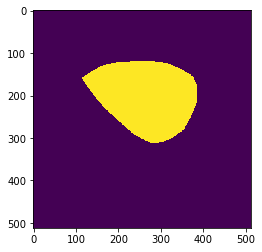

In [272]:

# mask_ll = dp_left["segmentation"] == dp_left["slab"]["left_liver"]
mask_ll = dp_left["data3d"] > 0
imshow(mask_ll[30])
# plt.colorbar()

[0 1]


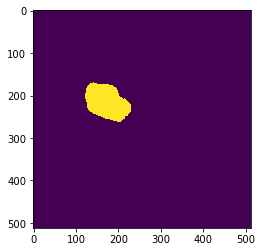

In [273]:
mask_li = dp_liver["data3d"] > 0
print(np.unique(dp_liver["data3d"]))
imshow(mask_li[20])
# plt.colorbar()

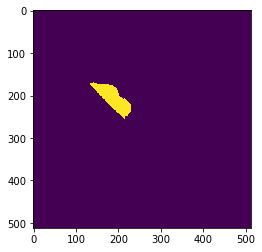

In [274]:
mask_ll_li = mask_li & mask_ll
imshow(mask_ll_li[20])

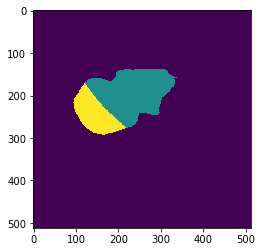

In [275]:
dp_liver["data3d"][dp_liver["data3d"] == 1] = 255
dp_liver["data3d"][mask_ll_li] = 128
imshow(dp_liver["data3d"][30])

## Are there both labels?

In [276]:
print(np.unique(dp_liver["data3d"]))

[  0 128 255]


In [277]:
help(io3d.write)

Help on function write in module io3d.datawriter:

write(data3d, path, filetype='auto', metadata=None)
    :param data3d: input ndarray
    :param path: output path, if braces are in the name ("dir/file{:04d}.dcm"), image stack is produced .
    Check function filename_format() for more details.
    :param filetype: dcm, png, h5, ... "image_stack"
    :param metadata: metadata f.e. {'voxelsize_mm': [3,2,2]}
    :return:



In [278]:
# fn = "ircad10.pklz"
io3d.write(dp_liver["data3d"], pth_output, metadata={"voxelsize_mm":dp_liver["voxelsize_mm"]})


# Check by read

2020-05-26 14:19:56.527 | DEBUG    | io3d.datareader:Get3DData:146 - file read recognized
2020-05-26 14:19:56.531 | DEBUG    | io3d.datareader:__ReadFromFile:254 - pklz format detected
2020-05-26 14:19:57.772 | DEBUG    | io3d.datareader:Get3DData:166 - dataplus format
2020-05-26 14:19:57.775 | DEBUG    | io3d.datareader:Get3DData:170 - datap keys () : dict_keys(['series_number', 'datadir', 'voxelsize_mm', 'data3d'])


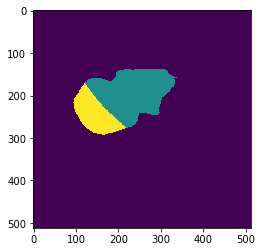

In [279]:
dap = io3d.read(pth_output, dataplus_format=True)

imshow(dap["data3d"][30])

In [280]:
max(0,4)

4